In [4]:
#import dependencies
from pathlib import Path
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.stats as st

In [15]:
#Create a path to the data
path = Path("../Resources/clean_consolidated_data.csv")

#read the data and convert it to a dataframe
df=pd.read_csv(path, low_memory=False)


In [16]:
#add new column for years to pay off debt

df["Years to Pay"]=(df['Median Debt at Graduation'] / (df['Mean earnings 6 years after school entry'] * 0.2))
df.head()

,Unnamed: 0.1,Unnamed: 0,UNITID,Institution Name,State,Region,Predominant Degree,Type of School,Admission Rate,Instate Tuition and Fees,...,Bachelor of English,Bachelor of Bio / Biomedical Sci,Bachelor of Math,Bachelor of Philosophy/Religion,Bachelor of Psychology,Bachelor of Social Science,Bachelor of Visual / Performing Arts,Bachelor of Business / Marketing,Bachelor of History,Years to Pay
0,0,0,100654,Alabama A & M University,AL,Southeast,3,Public,0.5010,6828.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,5.076437
1,1,1,100663,University of Alabama at Birmingham,AL,Southeast,3,Public,0.7223,6264.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.272727
2,2,3,100706,University of Alabama in Huntsville,AL,Southeast,3,Public,0.6368,8094.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.544529
3,3,4,100724,Alabama State University,AL,Southeast,3,Public,0.5080,8082.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,6.840094
4,4,5,100751,The University of Alabama,AL,Southeast,3,Public,0.4353,8600.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.011204


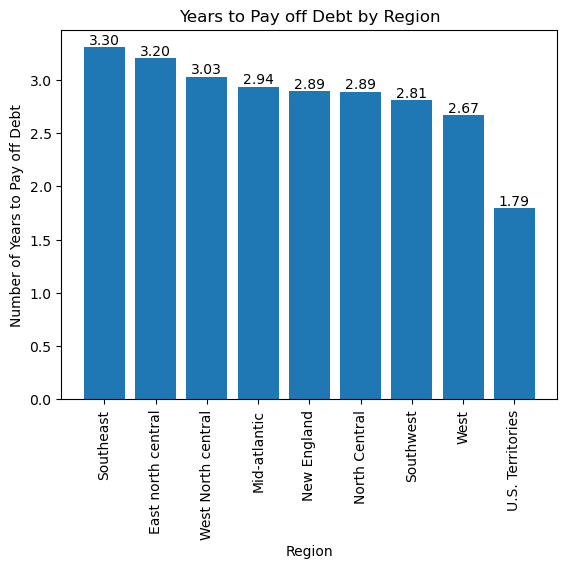

In [19]:
#create chart of years to pay off debt by region

region_mean_df= df.groupby(["Region"], as_index=False)['Years to Pay'].mean()
region_mean_df = region_mean_df.sort_values(by="Years to Pay", ascending=False)

#Bar chart for Region vs. Debt repayment rate 5 years
bar_label=region_mean_df['Years to Pay'].values.tolist()
bar_label= [ '%.2f' % elem for elem in bar_label ]

#plot just the column of data collected and format the data labels
barplot=plt.bar(region_mean_df['Region'], region_mean_df['Years to Pay'])
plt.xlabel("Region")
plt.ylabel("Number of Years to Pay off Debt")
plt.title("Years to Pay off Debt by Region")
plt.bar_label(barplot,labels=bar_label, label_type="edge")
plt.xticks(rotation=90)
plt.savefig('Fig5ky.png', bbox_inches='tight') 
plt.show()

In [42]:
#correlation testing by region and time to pay off debt
group0 = df[df["Region"] == 'Southeast']["Years to Pay"]
group1 = df[df["Region"] == 'East north central']["Years to Pay"]
group2 = df[df["Region"] == 'West North central']["Years to Pay"]
group3 = df[df["Region"] == 'Mid-atlantic']["Years to Pay"]
group4 = df[df["Region"] == 'New England']["Years to Pay"]
group5 = df[df["Region"] == 'North Central']["Years to Pay"]
group6 = df[df["Region"] == 'Southwest']["Years to Pay"]
group7 = df[df["Region"] == 'West']["Years to Pay"]
group8 = df[df["Region"] == 'U.S. Territories']["Years to Pay"]


results = stats.f_oneway(group0, group1)
results
print(results)


if results.pvalue < 0.5:
    print("We reject the null hypothesis, there is a difference")
else:
    print("We accept the null hypothesis, there is no difference")

F_onewayResult(statistic=0.9067635732445609, pvalue=0.34134329607402125)
We reject the null hypothesis, there is a difference


In [51]:
#stat testing for region and median debt
group0 = df[df["Region"] == 'Southeast']["Median Debt at Graduation"]
group1 = df[df["Region"] == 'East north central']["Median Debt at Graduation"]
group2 = df[df["Region"] == 'West North central']["Median Debt at Graduation"]
group3 = df[df["Region"] == 'Mid-atlantic']["Median Debt at Graduation"]
group4 = df[df["Region"] == 'New England']["Median Debt at Graduation"]
group5 = df[df["Region"] == 'North Central']["Median Debt at Graduation"]
group6 = df[df["Region"] == 'Southwest']["Median Debt at Graduation"]
group7 = df[df["Region"] == 'West']["Median Debt at Graduation"]
group8 = df[df["Region"] == 'U.S. Territories']["Median Debt at Graduation"]


results = stats.f_oneway(group3, group4, group1)
results
print(results)


if results.pvalue < 0.5:
    print("We reject the null hypothesis, there is a difference")
else:
    print("We accept the null hypothesis, there is no difference")

F_onewayResult(statistic=0.44873949655778334, pvalue=0.6386479144668402)
We accept the null hypothesis, there is no difference


In [54]:
#stat testing by mean earnings and region

group0 = df[df["Region"] == 'Southeast']['Mean earnings 6 years after school entry']
group1 = df[df["Region"] == 'East north central']['Mean earnings 6 years after school entry']
group2 = df[df["Region"] == 'West North central']['Mean earnings 6 years after school entry']
group3 = df[df["Region"] == 'Mid-atlantic']['Mean earnings 6 years after school entry']
group4 = df[df["Region"] == 'New England']['Mean earnings 6 years after school entry']
group5 = df[df["Region"] == 'North Central']['Mean earnings 6 years after school entry']
group6 = df[df["Region"] == 'Southwest']['Mean earnings 6 years after school entry']
group7 = df[df["Region"] == 'West']['Mean earnings 6 years after school entry']
group8 = df[df["Region"] == 'U.S. Territories']['Mean earnings 6 years after school entry']


results = stats.f_oneway(group4, group7)
results
print(results)


if results.pvalue < 0.5:
    print("We reject the null hypothesis, there is a difference")
else:
    print("We accept the null hypothesis, there is no difference")

F_onewayResult(statistic=2.3270945102309346, pvalue=0.1284341072208105)
We reject the null hypothesis, there is a difference


In [27]:
#function for collecting linear regression data

from scipy.stats import linregress

def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
   # Return the calculated values
    return slope, intercept, r_value, std_err

In [28]:
#calculate linear regression

lin_values=linear_regression(df['Mean earnings 6 years after school entry'], df['Years to Pay'])


In [30]:
lin_values[2]

-0.4974904111736971

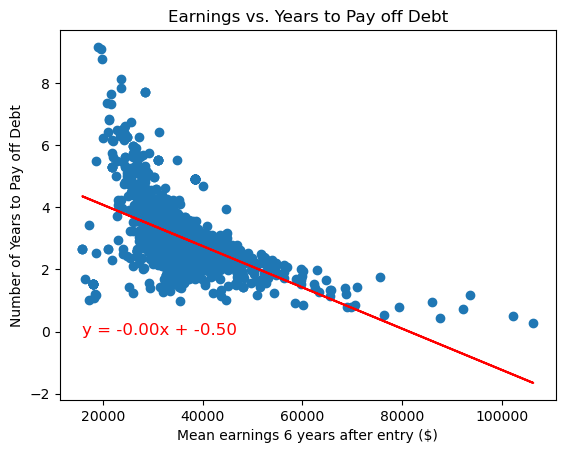

In [29]:
#scatter of repayment rate vs. earnings
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df['Mean earnings 6 years after school entry'], df['Years to Pay'])

# Get regression values
regress_values = df['Mean earnings 6 years after school entry'] * lin_values[0] + lin_values[2]

#plot data

plt.scatter(df['Mean earnings 6 years after school entry'], df['Years to Pay'], marker='o')
plt.xlabel("Mean earnings 6 years after entry ($)")
plt.ylabel("Number of Years to Pay off Debt")
plt.title("Earnings vs. Years to Pay off Debt")
plt.plot(df['Mean earnings 6 years after school entry'], lin_values[0] * df['Mean earnings 6 years after school entry'] + lin_values[1],
         color='red', label='Linear Regression')


equation =f'y = {lin_values[0]:.2f}x + {lin_values[2]:.2f}'
plt.text(df['Mean earnings 6 years after school entry'].min(), df['Years to Pay'].min(),
         equation, fontsize=12, color='red', ha='left', va='top')

plt.savefig('Fig6ky.png', bbox_inches='tight') 
plt.show()